# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Fixed Percentage Implementation

Fixed percentage position sizing is a technique where you spend only a fixed portion of the available capital to place trades. The remaining is not used in trading. In this notebook, you will learn to implement the fixed percentage position sizing technique on the index reversal strategy. The notebook is divided into the following parts:

1. [Read the Data](#read)
1. [Fixed Percentage Portfolio Calculation](#pct)
1. [Portion of Capital and Leverage Ratio](#capital)
    
## Import Libraries

In [1]:
# Data manipulation
import pandas as pd

# Quantra function to analyse the performance
import sys
sys.path.append("..")
from data_modules.position_sizing_quantra import performance_analysis

# Import matplotlib and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

<a id='read'></a>
## Read the Data

The SPY ETF data is read and the fixed percentage technique is applied to the index reversal strategy. The SPY ETF price is read from `SPY_data_15_59.csv` and the index reversal strategy's trading signal and the portfolio value are read from a file named `strategy_data.csv`.

In [2]:
# Read the price data of one minute before the market close
spy_price = pd.read_csv(
    '../data_modules/SPY_data_15_59.csv', index_col=0, parse_dates=True)

# Set the date as the index for the price data
spy_price.index = pd.to_datetime(spy_price.index.date)

# Consider the data starting from 1st January 2005
spy_price = spy_price.loc['2005-01-01':]

# Read the signal and cumulative returns of the index reversal strategy
strategy = pd.read_csv('../data_modules/strategy_data.csv',
                       index_col=0, parse_dates=True)

# Preview the strategy data
strategy.head()

,signal,returns,cumulative_returns
2005-01-03,0,-0.000000,1.000000
2005-01-04,1,-0.000000,1.000000
2005-01-05,1,-0.003537,0.996463
2005-01-06,0,0.003296,0.999747
2005-01-07,0,-0.000000,0.999747


<a id='pct'></a>
## Fixed Percentage Portfolio Calculation

A fixed percentage of the available capital is used for each trade. The portfolio value is calculated by performing the following steps:
1. Calculate the portfolio value as the sum of the capital used for trading and the capital not used for trading.
$$ \text{Portfolio value} = \text{Portion of capital used for trading} + \text{Portion of capital not used for trading} $$
<br>
2. The portion of capital used for trading increases as the strategy returns increase.
$$ \text{Portion of capital used for trading} = \text{Cumulative strategy returns} * \text{Initial capital} * \text{Fixed percentage of capital}$$
<br>
3. The portion of capital not used for trading is the remaining portion of the portfolio value left after taking out the fixed percentage portion.
$$ \text{Portion of capital not used for trading} = \text{Initial capital} * (1-\text{Fixed percentage of capital})$$

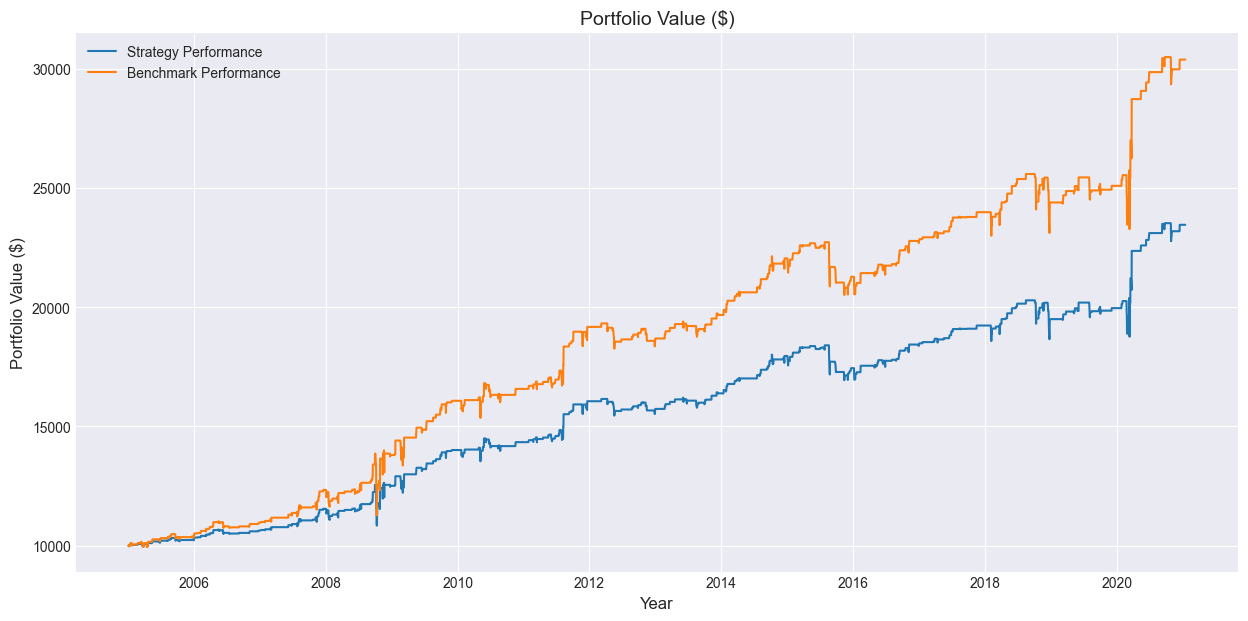

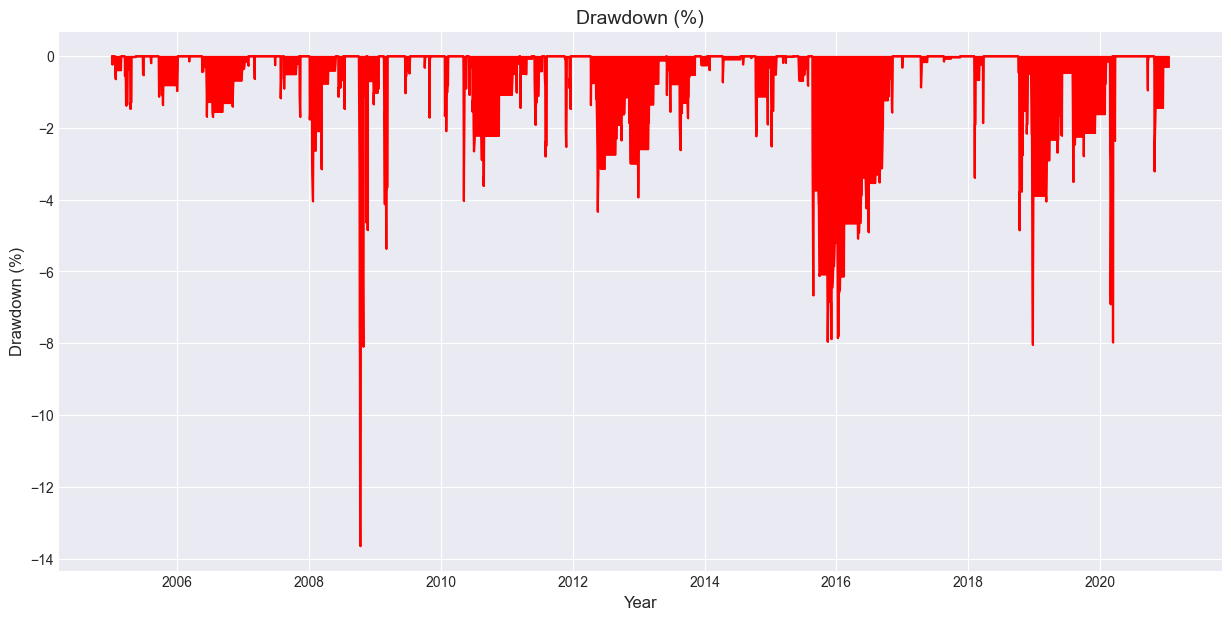

Total returns: 134.63%
Annualised returns (CAGR): 5.47%
Maximum drawdown (MDD): -13.65%
Return-to-MDD ratio: 0.4


In [3]:
# Define the initial capital
initial_capital = 10000

# Fixed percentage value
percentage_of_capital = 0.66

# Dataframe to store strategy returns for fixed percentage technique
fixed_percent = pd.DataFrame()

# Calculate the portfolio value after implementation of the fixed percentage
fixed_percent['portfolio_value'] = strategy['cumulative_returns'] * \
    initial_capital * percentage_of_capital + \
    initial_capital * (1 - percentage_of_capital)

# Calculate the performance metrics and plot the portfolio value alongwith the benchmark
performance_analysis(
    fixed_percent['portfolio_value'].dropna(),
    strategy['cumulative_returns']*initial_capital
)

<a id='capital'></a>
## Portion of Capital Used and Leverage

The portion of capital used will be equal to the percentage value (`percentage_of_capital`) multiplied by the portfolio value (`fixed_percent['portfolio_value']`). This is because the available capital at any time is the portfolio value. And the portion used for trading is the fixed percentage part of the portfolio value.

The leverage will always be equal to the percentage value (`percentage_of_capital`) fixed for the position sizing technique. This is because in the fixed percentage position sizing technique, a portion of the available capital is used for trading. Since this percentage is fixed, the leverage ratio is fixed.


## Tweak the code
You can tweak the code as follows:

1. Use different values of `percentage_of_capital` and see how the performance varies.
1. Use a different combination of `initial_capital` and `percentage_of_capital`.

In the upcoming section, you will learn about the volatility targeting position sizing technique.
<br><br>